# **Neural Network Classification Project with TensorFlow**

**What is TensorFlow?**

TensorFlow is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models 



**Why use TensorFlow?**



Rather than building machine learning and deep learning models from scratch, it's more likely we'll use a library such as TensorFlow. This is because it contains many of the most common machine learning functions we'll want to use.

In [1]:
import tensorflow as tf
tf.__version__
print(tf.config.list_physical_devices('GPU')) #we don't have access to a GPU
!nvidia-smi

[]
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



##One of most important aspect of Deep Learning is converting our tensors into proper range of numbers: To do that we use two techniques:

Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.

Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.

With neural networks we'll tend to favour normalization as they tend to prefer values between 0 and 1.


## Creating data to view and fit the model

We could start by importing a classification dataset but let's practice making some of our own classification data.

Treating it as a rehersal experiment before the actual experiment(s). We'll use Scikit-Learn's make_circles() function.

The below experiment will form the basis for upcoming experiment ie Food Vision




In [ ]:
from sklearn.datasets import make_circles # importing make_circles dataset
samples = 1000
X,y = make_circles(samples, noise=0.05, random_state=42) #5% random data points 
len(X), len(y), X.shape, y.shape

(1000, 1000, (1000, 2), (1000,))

In [ ]:
X # data with 2 dimension

array([[ 0.74220688,  0.24668576],
       [-0.7340323 ,  0.16869164],
       [-0.82985872,  0.22195899],
       ...,
       [-0.12823057, -0.82613318],
       [ 0.66090453, -0.79319015],
       [ 0.27841491,  0.96735953]])

In [ ]:
y[:10] # label, binary classification, scalar values ie 1D 

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'label':y}) # creating a dataframe for the above data using pandas
circles.head()

,X0,X1,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


In [ ]:
circles['label'].value_counts() #we are dealing with binary data(0,1)

1    500
0    500
Name: label, dtype: int64

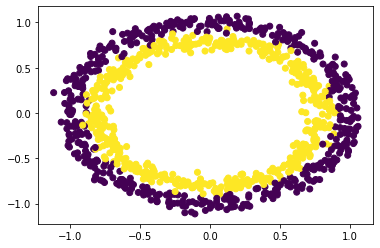

In [ ]:
# Now visualization the above data
plt.scatter(X[:,0],X[:,1],c=y)
# Our goal will be to distinguish between yellow and purple dots

Using [[Tensorflow Playground]](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true) and we'll try to make a working model

In [ ]:
# As length of both X and y is same, let's check its 1st values
X[0],y[0] # 2 values of X to predict y ie 2 inputs in Neural Network and 1 output

(array([0.74220688, 0.24668576]), 1)

## Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

#### MODEL_1

In [ ]:
#Set random seed
tf.random.set_seed(42)
#Creating a model using Sequential API
model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1) #output layer
)
#Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # using BinaryCrossentropy as y has binary values 0 and 1
                optimizer = tf.keras.optimizers.SGD(), # for optimizer, we are using Stochastic gradient descent 
                metrics = ['accuracy']
                )
#Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8649 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7212 - accuracy: 0.5130
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.5010
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4960


In [ ]:
model_1.evaluate(X,y) # Evaluating the model

32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5040


[0.6938623785972595, 0.5040000081062317]

In [ ]:
# model_1 summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


###### We are getting accuracywhich is less than 50% ie worst than guessing the output. Reasons could be less epochs, less hidden layers, optimizer

####MODEL_2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model, epochs changed from 5 in model_1 to 100
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less and extra epochs

In [ ]:
model_2.evaluate(X,y) # still it seems our model is guessing.

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


## Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here we might want to add more layers, increase the number of hidden units/neurons within each layer, change the activation functions of each layer.
2. **Compiling a model** - we might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps we could fit a model for more epochs (leave it training for longer).


We'll try adding more neurons, an extra layer and Adam optimizer

####MODEL_3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers,without activation)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons with input_shape defined (None, 1)
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6939621567726135, 0.5]

#### Inspite adding more hidden layers, increasing epochs and changing optimizer from SGD to Adam, no improve. Let's visualize the data and check what is happening under the hood

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:



In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), # linspace gives numbers that are evenly spaced between given range
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together(np.c_ concats x and y value): 

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class- what is green was also there along with red and blue
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing multiclass classification...


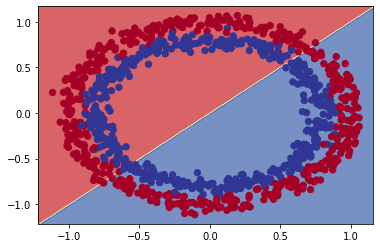

In [ ]:
# Check out the predictions our model is making 
plot_decision_boundary(model_3, X, y)


####Looks like our model is trying to draw a straight line through the data i.e it follows linearity whereas we need both linear and non linear lines

The main change we'll add to models we've built before is the use of the activation. Using Tensorflow Playground and replicating the working model

####MODEL_4

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),  # using RElu activation fn
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]) 

# Fit the model
model_4.fit(X, y, epochs=100, verbose=0) #

In [ ]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693183958530426, 0.5]

##### Still not getting the desired output. Let's Increase the hidden layers and changing the output activation to sigmoid

####MODEL_5

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), 
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # decreasing the learning rate from 0.01 to 0.001
                metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Evaluate our model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.9480


[0.3460318446159363, 0.9480000138282776]

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


doing binary classifcation...


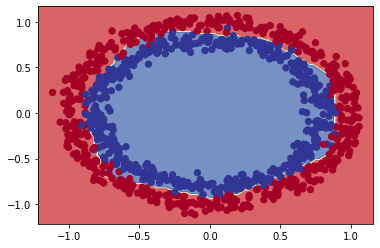

In [ ]:
plot_decision_boundary(model_5, X, y)

#### A good combination of linear and non-linear lines and tweaking the activation and changing the amount of hidden layers can make a great difference.
We've been evaluating our model on the same data it was trained on X,y.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
# Split data into train and test sets. Can also use train_test_split 
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

In [ ]:
# Check the shapes of the data
X_train.shape, X_test.shape, y_train.shape,y_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2), (800,), (200,))

####MODEL_6

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy, 
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning ie after every epoch
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X_train, y_train, epochs=25) # epochs decrease, lr increase

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 4ms/step - loss: 0.6849 - accuracy: 0.5437
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5650
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.5537
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.5750
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.5938
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.5863
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.6800
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.7212
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7462
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7513
Epoch 11/25
25/25 [===========

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.1986 - accuracy: 0.9400
Model loss on the test set: 0.19855165481567383
Model accuracy on the test set: 94.00%


### Model_6 accuracy is above 90%
We changed a few things:

**The activation parameter - We used strings ("relu" & "sigmoid") instead of using library paths (tf.keras.activations.relu), in TensorFlow, they both offer the same functionality.

**The learning_rate (also lr) parameter - We increased the learning rate parameter in the Adam optimizer to 0.01 instead of 0.001 (an increase of 10x)

**The number of epochs - We lowered the number of epochs (using the epochs parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets because we increased the learning rate.

doing binary classifcation...
doing binary classifcation...


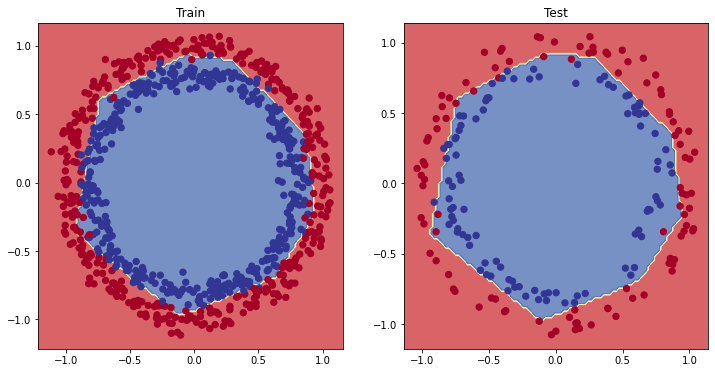

In [ ]:
# Plot the decision boundaries for the training and test sets using matplotlib library
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X=X_test, y=y_test)
plt.show()

With a few tweaks, our model is now predicting the blue and red circles almost perfectly.

But to know how the model was learning and how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the loss curves (also referred to as the learning curves). Using the variable history when calling the fit() function on a model (fit() returns a History object).

This is where we'll get the information for how our model is performing as it learns.

In [ ]:
#History.history attribute is a record of training loss values and metrics values at successive epochs
pd.DataFrame(history.history) # 25 epochs

,loss,accuracy
0,0.684893,0.54375
1,0.677427,0.56500
2,0.673757,0.55375
3,0.668157,0.57500
4,0.663156,0.59375
5,0.655012,0.58625
6,0.641738,0.68000
7,0.625133,0.72125
8,0.600576,0.74625
9,0.572457,0.75125


We can see the loss values going down and the accuracy going up. 

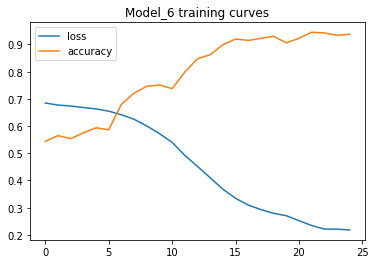

In [ ]:
# Plot the loss curves. 
pd.DataFrame(history.history).plot()
plt.title("Model_6 training curves")
plt.show()

The loss function going down means the model is improving (the predictions it's making are getting closer to the truth labels).

Now we'll add learning rate callback. Callback are an extra piece of functionality we can add to the model while its training.


####MODEL_7


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback. 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
#in the Lr scheduler-give lr values starting from 1e-4 and increase by 10 to the power epoch/20
# Fit the model (passing the lr_scheduler callback)
history = model_7.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

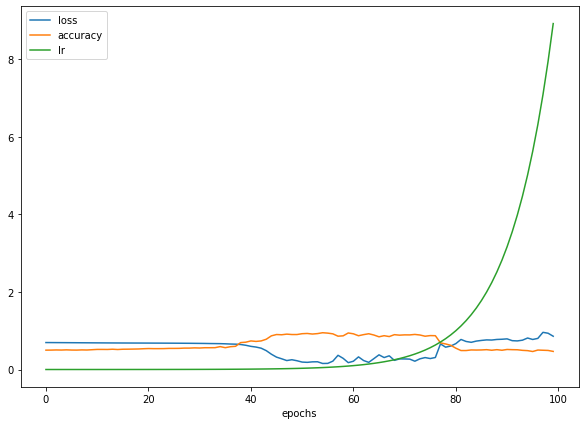

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");


Goal is to find lr where the loss decreases the fastest

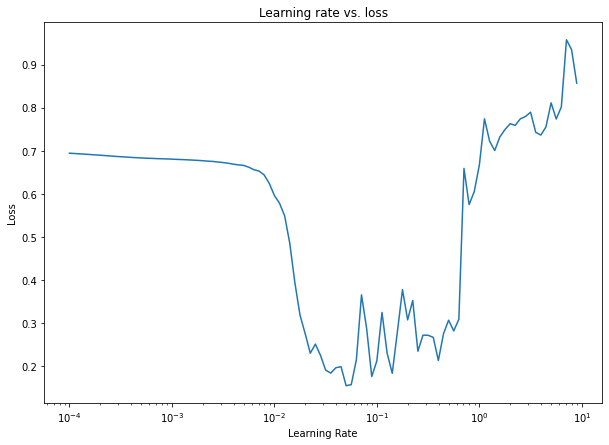

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))# replicate the epoch values for demo purpose
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate, the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.01 (10−2) and 0.02.

####MODEL_8

In [ ]:
#Set a random seed
tf.random.set_seed(42)

#Creating a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation= 'relu'),
    tf.keras.layers.Dense(4,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'sigmoid')
])

# Compile the model with the ideal learning rate
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # using the learning rate
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_8.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5688
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5738
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6623 - accuracy: 0.5925
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.6463
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.7412
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.8350
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8275
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8575
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8900
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.9200
Epoch 11/20
25/25 [===========

With a little higher learning rate (0.02 instead of 0.01) we reach a higher accuracy than model_7 in less epochs (20 instead of 25).

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9200


[0.1920068860054016, 0.9200000166893005]

doing binary classifcation...
doing binary classifcation...


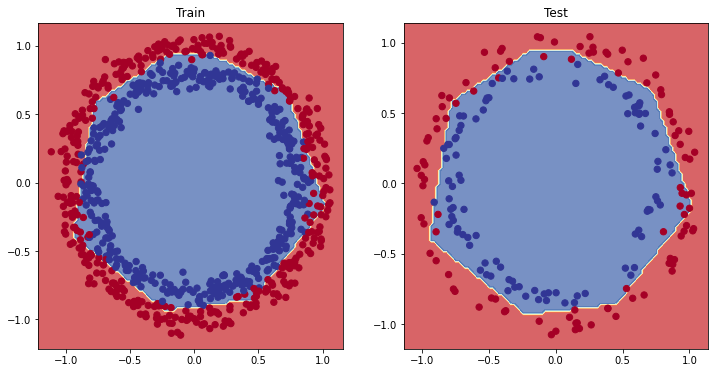

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [ ]:
#Let's create a confusion matrix
from sklearn.metrics import confusion_matrix
# make prediction
y_preds = model_8.predict(X_test) 
y_preds[:5], y_test[:5]




(array([[0.9797064 ],
        [0.9993455 ],
        [0.99573684],
        [0.9944037 ],
        [0.40817887]], dtype=float32), array([1, 1, 1, 1, 0]))

y_pred in a form called prediction probabilities. We need to round the values to 0 or 1

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Now we'll use confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[86, 15],
       [ 1, 98]])

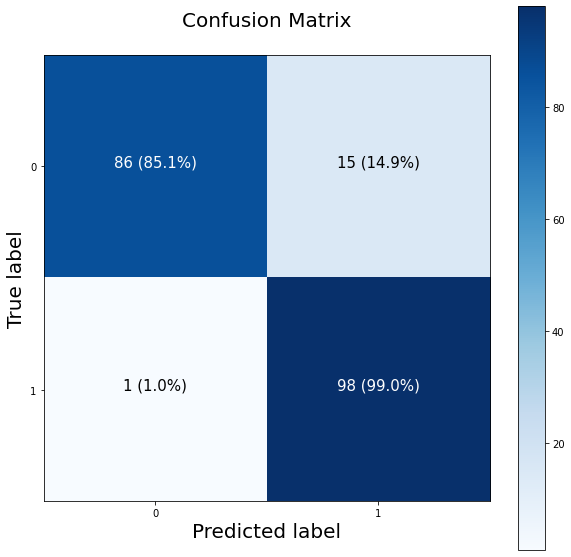

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
#plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix, check link https://i.stack.imgur.com/zkMBy.png
n_classes = cm.shape[0] # no of rows are 2, so 2 classes

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html, plt.colormap.Blues
fig.colorbar(cax)

# Create classes
classes = False # if multiclass then True, our case is false as only binary

if classes: # if True
  labels = classes  # labels = those many no of classes
else:
  labels = np.arange(cm.shape[0]) # else labels will be cm.shape[0] ie 2(0,1)

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)


# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors- different shades of squares depending on the values- diagonals to be dark
threshold = (cm.max() + cm.min()) / 2. # cm.max is 99 and cm.min is 0

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # range(0,2) for i, range(0,2) for j
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if we had multiple different classes of things?

TensorFlow has a multiclass classication dataset known as [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist)
We can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.


In [ ]:
from tensorflow.keras.datasets import fashion_mnist# dataset for tf are already splitted

# The data has already been sorted into training and test sets for us
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() # for downloading the dataset

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Let's check train data and train labels
X_train[:5], y_train[:5]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,


In [ ]:
#Let's check the shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

####In X_train, 60000 images in the form of tensors and 28x28 is the length and width. But these are just numbers, let's visualize.

9


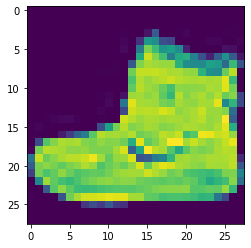

In [ ]:
plt.imshow(X_train[0])
print(y_train[0]) # at 0 position, label 9 exist which may represent boot

After checking [MNIST Dataset](https://github.com/zalandoresearch/fashion-mnist), we find there are 10 classes

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(len(class_names))

10


23690


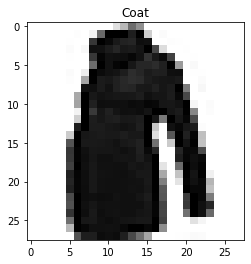

In [ ]:
#Let's plot image and corresponding label
random_no = np.random.randint(0,len(X_train)+1)
print(random_no)
plt.imshow(X_train[random_no],cmap=plt.cm.binary)
plt.title(class_names[y_train[random_no]]);

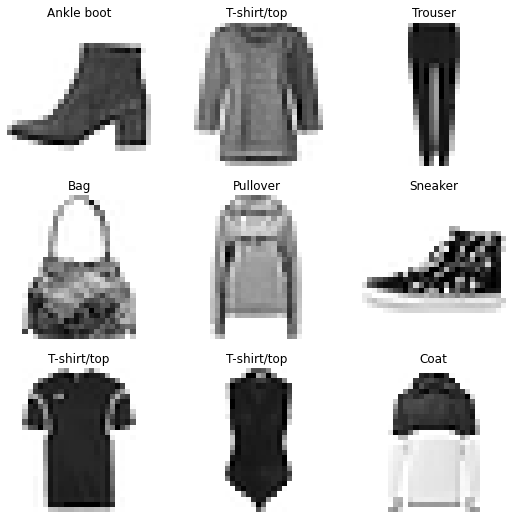

In [ ]:
#Let's plot 9 images and corresponding labels at the same time
plt.figure(figsize=(9,9))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_no = np.random.randint(0,len(X_train))
  plt.imshow(X_train[random_no],cmap=plt.cm.binary)
  plt.title(class_names[y_train[random_no]])
  plt.axis(False)



Since this is a multiclass classification problem, we'll need to make a few changes to our architecture:

The input shape will have to deal with 28x28 tensors (the height and width of our images).

We're actually going to squash the input into a tensor (vector) of shape (784).

The output shape will have to be 10 because we need our model to predict for 10 different classes.

We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'

We'll need to change our loss function from a binary loss function to a multiclass loss function ie we'll use tf.keras.losses.SparseCategoricalCrossentropy() instead of tf.keras.losses.CategoricalCrossentropy().

Using test_data as validation_data 



In [ ]:
#Checking y_train
print(y_train[:10])# dtype on in int/float format
#Let's one hot encode it
tf.one_hot(y_train[:5],depth=5) #dtype now float32

[9 0 0 3 0 2 7 2 5 5]


<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

####MODEL_1 --> X data is not normalized

In [ ]:
#set random seed
tf.random.set_seed(42)

#Create a model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),#reshape 28x28 to 784 and shape of None
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(10, activation="softmax") # output shape is 10(labels), activation is softmax

])
 #Compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(), # if SparseCategoricalCrossentropy() is used, no need for OneHotEncoder
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
#Fit the data
non_norm_history = model_1.fit(X_train,
                                tf.one_hot(y_train,depth=10),
                                epochs=10,
                                validation_data=(X_test, tf.one_hot(y_test,depth=10))) # using OneHotEncoder on labels

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 3140      
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


#####Accuracy is very less for model_1. One reason could be data is not normalized, hence why we used the non_norm_history variable when calling fit()). In model_1, pixel values are between 0 and 255.

In [ ]:
# To normalize the tensors, let's check the min and max values of X_train
print(X_train.min()), print(X_train.max())

0
255


(None, None)

#### To get the above values between 0 and 1, we will divide the X_train, X_test by 255. This is known as Scaling or Normalization

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data_norm = X_train / 255.
test_data_norm = X_test / 255.

In [ ]:
# Check the min and max values of the training data and test data
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max() 

(0.0, 1.0, 0.0, 1.0)

####MODEL_2 --> Using the above normalized train and test data train our model_2

In [ ]:
#set random seed
tf.random.set_seed(42)

#Create a model

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(10,activation='softmax')

])
# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_2.fit(train_data_norm,
                            y_train,
                            epochs=10,
                            validation_data=(test_data_norm, y_test))
# Ideallyby normalizing, the accuracy for validation data should increase

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

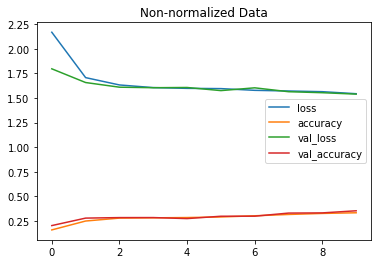

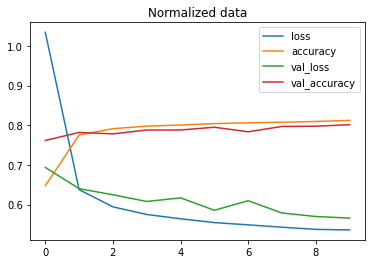

In [ ]:
#Let's plot each model's history (their loss curves).
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

From these two plots, we can see how much quicker our model with the normalized data (model_2) improved than the model with the non-normalized data (model_1) but it seems model_2 could be overfitting.

Let's find the ideal learning rate by using the same architecture we've been using on non normalized data

####MODEL_3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback to find an appropriate lr
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_3.fit(X_train,
                               y_train,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(X_test, y_test),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7058 - accuracy: 0.2488 - val_loss: 1.6514 - val_accuracy: 0.2856 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6401 - accuracy: 0.2788 - val_loss: 1.6244 - val_accuracy: 0.2739 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6185 - accuracy: 0.2823 - val_loss: 1.6034 - val_accuracy: 0.2948 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6065 - accuracy: 0.2955 - val_loss: 1.6050 - val_accuracy: 0.3221 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5908 - accuracy: 0.3097 - val_loss: 1.5778 - val_accuracy: 0.3068 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

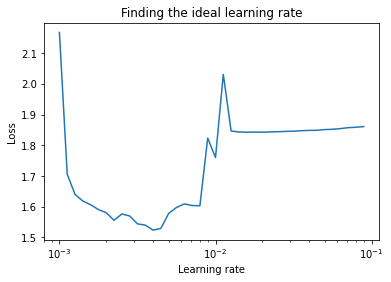

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.
Let's refit a model using the ideal learning rate.


####MODEL_4

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default) from the graph
                 metrics=["accuracy"])

# Fit the model
history = model_4.fit(train_data_norm,
                       y_train,
                       epochs=20,
                       validation_data=(test_data_norm, y_test))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

1. Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).

2. Assess some of its predictions (through visualizations).

3. Improve its accuracy (by training it for longer or changing the architecture).

4. Save and export it for use in an application.

Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.



In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

Since a confusion matrix compares the truth labels (test_labels) to the predicted labels, we have to make some predictions with our model.

In [ ]:
# Make predictions with the most recent model
y_probs = model_4.predict(test_data_norm) 

# View the first 5 predictions
y_probs[:5]# if training data was trained on normalized data, make prediction on normalized data

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Our model outputs a list of prediction probabilities, i.e it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.


In [ ]:
# See the predicted class number and label for the first example
y_probs[0]

array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
       5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
       4.0605278e-03, 8.0787367e-01], dtype=float32)

In [ ]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()], class_names[9]

(9, 'Ankle boot', 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

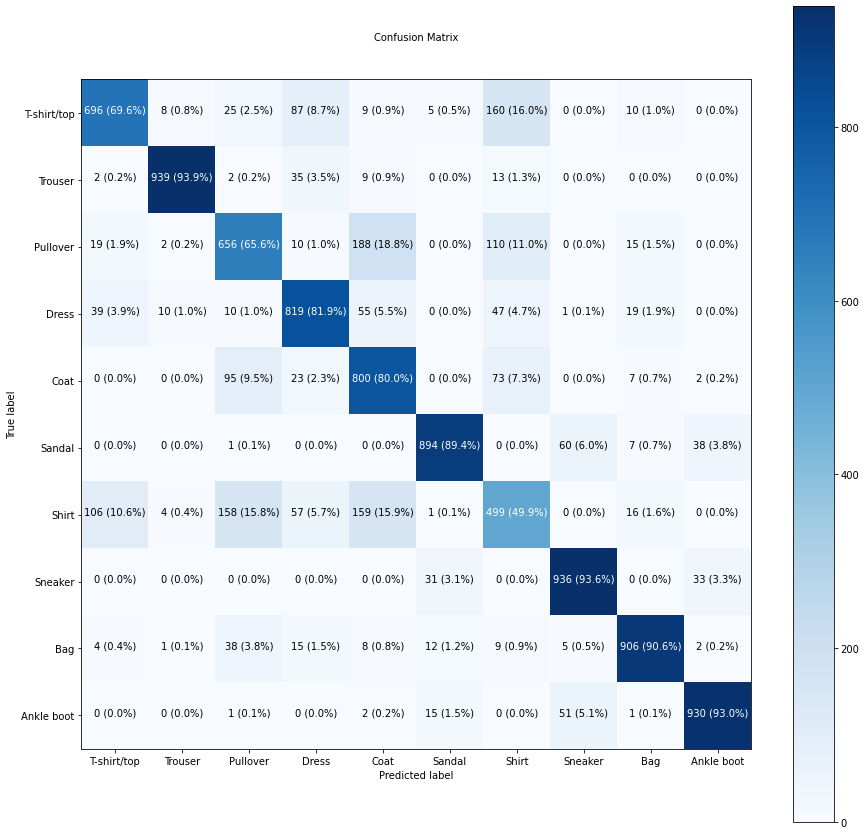

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

Let's create a function to plot a random image along with its prediction.



In [ ]:
import random
# Function for Plot an image, prediction on said image,label the plot with truth label and predicted label
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs), # max value in pred_probs
                                                   true_label),
             color=color) # set the color to green or red

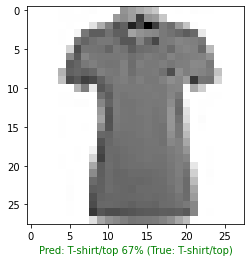

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4, 
                  images=test_data_norm, 
                  true_labels=y_test, 
                  classes=class_names)

It seems to mix up classes which are similar, for example, Sneaker with Ankle boot.


In [ ]:
# Find the layers of our most recent model
model_4.layers

And we can find the patterns learned by a particular layer using the get_weights() method.

The get_weights() method returns the weights and biases of a particular layer.


In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# Shape = 0 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape 

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape# bias vector as 1 value per hidden unit -in this case 4 

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

In [ ]:
# Can now calculate the number of paramters in our model
model_4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 4)                 3140      
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

Starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility plot_model().


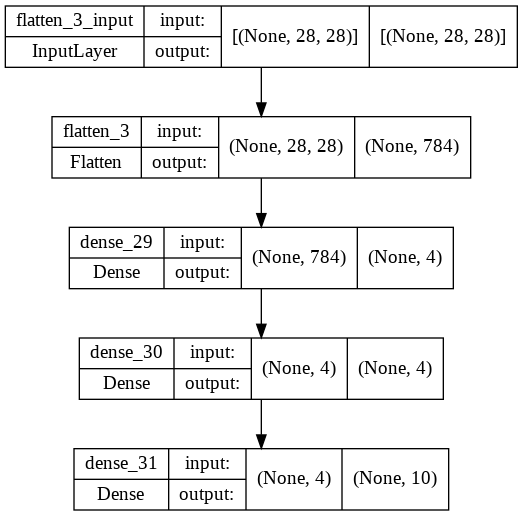

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() function).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.


## **Convolutional Neural Networks and Computer Vision with TensorFlow**

Now we're going to get specific and see how a special kind of neural network, convolutional neural networks (CNNs) can be used for computer vision (detecting patterns in visual data).

Steps in modelling for image classification with CNNs


1. Becoming one with the data
2. Preparing data for modelling
3. Creating a CNN model (starting with a baseline)
4. Fitting a model (getting it to find patterns in our data)
5. Evaluating a model
6. Improving a model
7. Making a prediction with a trained model




Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes. However, the dataset used here is modified to have only 2 classes: Pizza and steaks(Starting with smaller dataset)

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

We'll download the pizza_steak subset .zip file and unzip it.

In [ ]:
import zipfile
#Download zipfile for pizza/steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip','r')
zip_ref.extractall()
zip_ref.close()

--2022-07-03 04:46:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.7MB/s    in 3.3s    

2022-07-03 04:46:52 (31.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data we're working with.

Let's inspect the data we just downloaded.



Let's inspect each of the directories we've downloaded.

To so do, we can use the command ls which stands for list.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train #checking train directory

pizza  steak


In [ ]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
# Walk through pizza_steak directory and list number of files
import os
for dirpath, dirnames,filenames in os.walk('pizza_steak'):
  print(f"dirpath:{dirpath}, dirnames:{dirnames}, filenames:{filenames}")


dirpath:pizza_steak, dirnames:['test', 'train'], filenames:[]
dirpath:pizza_steak/test, dirnames:['steak', 'pizza'], filenames:[]
dirpath:pizza_steak/test/steak, dirnames:[], filenames:['168551.jpg', '864661.jpg', '3013404.jpg', '2382600.jpg', '399377.jpg', '1094883.jpg', '289822.jpg', '2981911.jpg', '3622237.jpg', '321090.jpg', '2014349.jpg', '3315737.jpg', '1882831.jpg', '966174.jpg', '1319758.jpg', '894825.jpg', '552171.jpg', '48208.jpg', '378397.jpg', '400951.jpg', '1983405.jpg', '912108.jpg', '1285886.jpg', '2285106.jpg', '565095.jpg', '413497.jpg', '2308682.jpg', '1499273.jpg', '429304.jpg', '2814314.jpg', '3088325.jpg', '60819.jpg', '2353677.jpg', '2989645.jpg', '3048920.jpg', '2984679.jpg', '284097.jpg', '2246332.jpg', '926656.jpg', '7056.jpg', '3576324.jpg', '2685931.jpg', '3029602.jpg', '790544.jpg', '2077577.jpg', '3293650.jpg', '2315011.jpg', '2943601.jpg', '3293212.jpg', '2512387.jpg', '1302563.jpg', '108310.jpg', '2756200.jpg', '1166047.jpg', '144370.jpg', '847477.jpg', '

In [ ]:
# Let's write the above data in a better manner
for dirpath, dirnames,filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in  {dirpath}")

There are 2 directories and 0 images in  pizza_steak
There are 2 directories and 0 images in  pizza_steak/test
There are 0 directories and 250 images in  pizza_steak/test/steak
There are 0 directories and 250 images in  pizza_steak/test/pizza
There are 2 directories and 0 images in  pizza_steak/train
There are 0 directories and 750 images in  pizza_steak/train/steak
There are 0 directories and 750 images in  pizza_steak/train/pizza


In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Another way to find out how many images are in a file
print(len(os.listdir('pizza_steak/train/pizza')))
print(len(os.listdir('pizza_steak/test/steak')))

750
250


In [ ]:
#Let's randomly check training examples by viewing the images of pizza and steak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

# Let's create a function to randomly view images 
def view_random_image(target_class):
  # Setup target directory
  target_folder = 'pizza_steak/train/'+target_class
  print(f'The target folder is: {target_folder}')

  #Using os.listdir to extract a random image
  random_image = random.sample(os.listdir(target_folder),1)
  print(f'The random image is : {random_image}') # random image in tensor format
  print(random_image[0])

  #Plot the image using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) # ransom_image[0] to remove []
  print(f"Image shape is : {img.shape}")
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  return img




The target folder is: pizza_steak/train/pizza
The random image is : ['3704879.jpg']
3704879.jpg
Image shape is : (512, 512, 3)


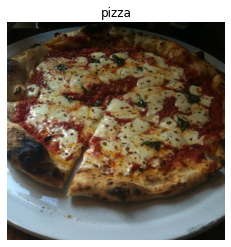

In [ ]:

pizza_steak = random.choice(['pizza','steak'])

if pizza_steak =='pizza':
  img = view_random_image(target_class="pizza")
elif pizza_steak=='steak':
  img = view_random_image(target_class="steak")



In [ ]:
img

array([[[11, 10,  6],
        [ 9,  8,  4],
        [ 8,  7,  3],
        ...,
        [ 7,  8,  3],
        [ 7,  8,  3],
        [ 7,  8,  3]],

       [[10,  9,  5],
        [ 9,  8,  4],
        [ 9,  8,  4],
        ...,
        [ 7,  8,  3],
        [ 7,  8,  3],
        [ 7,  8,  3]],

       [[ 9,  8,  4],
        [ 9,  8,  4],
        [12, 11,  7],
        ...,
        [ 7,  8,  3],
        [ 7,  8,  3],
        [ 7,  8,  3]],

       ...,

       [[72, 53, 38],
        [72, 53, 38],
        [70, 51, 36],
        ...,
        [16, 13,  8],
        [16, 13,  8],
        [16, 13,  8]],

       [[71, 52, 37],
        [71, 52, 37],
        [71, 52, 37],
        ...,
        [17, 14,  9],
        [16, 13,  8],
        [15, 12,  7]],

       [[70, 51, 36],
        [72, 53, 38],
        [73, 54, 39],
        ...,
        [17, 14,  9],
        [16, 13,  8],
        [14, 11,  6]]], dtype=uint8)

In [ ]:
#The entire Food101 dataset comprises of similar images from 101 different classes.
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[11, 10,  6],
        [ 9,  8,  4],
        [ 8,  7,  3],
        ...,
        [ 7,  8,  3],
        [ 7,  8,  3],
        [ 7,  8,  3]],

       [[10,  9,  5],
        [ 9,  8,  4],
        [ 9,  8,  4],
        ...,
        [ 7,  8,  3],
        [ 7,  8,  3],
        [ 7,  8,  3]],

       [[ 9,  8,  4],
        [ 9,  8,  4],
        [12, 11,  7],
        ...,
        [ 7,  8,  3],
        [ 7,  8,  3],
        [ 7,  8,  3]],

       ...,

       [[72, 53, 38],
        [72, 53, 38],
        [70, 51, 36],
        ...,
        [16, 13,  8],
        [16, 13,  8],
        [16, 13,  8]],

       [[71, 52, 37],
        [71, 52, 37],
        [71, 52, 37],
        ...,
        [17, 14,  9],
        [16, 13,  8],
        [15, 12,  7]],

       [[70, 51, 36],
        [72, 53, 38],
        [73, 54, 39],
        ...,
        [17, 14,  9],
        [16, 13,  8],
        [14, 11,  6]]], dtype=uint8)>

In [ ]:
img.shape, img.size # shape gives width, height, color. here 3 is always constant ie RGB
# Also all the values range between 0-255 ie they are not normalized. It is also the range of RGB colors

((512, 512, 3), 786432)

In [ ]:
img/255. # Normalized values

array([[[0.04313725, 0.03921569, 0.02352941],
        [0.03529412, 0.03137255, 0.01568627],
        [0.03137255, 0.02745098, 0.01176471],
        ...,
        [0.02745098, 0.03137255, 0.01176471],
        [0.02745098, 0.03137255, 0.01176471],
        [0.02745098, 0.03137255, 0.01176471]],

       [[0.03921569, 0.03529412, 0.01960784],
        [0.03529412, 0.03137255, 0.01568627],
        [0.03529412, 0.03137255, 0.01568627],
        ...,
        [0.02745098, 0.03137255, 0.01176471],
        [0.02745098, 0.03137255, 0.01176471],
        [0.02745098, 0.03137255, 0.01176471]],

       [[0.03529412, 0.03137255, 0.01568627],
        [0.03529412, 0.03137255, 0.01568627],
        [0.04705882, 0.04313725, 0.02745098],
        ...,
        [0.02745098, 0.03137255, 0.01176471],
        [0.02745098, 0.03137255, 0.01176471],
        [0.02745098, 0.03137255, 0.01176471]],

       ...,

       [[0.28235294, 0.20784314, 0.14901961],
        [0.28235294, 0.20784314, 0.14901961],
        [0.2745098 , 0

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. 

For CNN we need to add convolutional(Extracts/learns the most important features from target images) and Pooling layer (reduces the dimensionality of learned image features). 

The convolutional and pooling layers can often be arranged and rearranged into many different formations.

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end. 




###Workflow Typically includes: 
Load our images-->  Preprocess the images --> Build the CNN to find patterns in our images--> Compile our CNN--> Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set random seed
tf.random.set_seed(42)

#Preprocessing the data ie scaling/normalization
train_datagen = ImageDataGenerator(1/255.)
valid_datagen = ImageDataGenerator(1/255.)

#Set up the directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir, #flow_from_directory creates data and labels 
                                              batch_size=32, #no of images processed at a time
                                              target_size=(224,224), #converting all image to be of same size
                                               class_mode='binary',  #as only pizza and steak
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     class_mode='binary',
                                                     seed=42)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


####MODEl_1 : Creating a CNN model. 
Inspired by https://poloclub.github.io/cnn-explainer/

In [ ]:
#Set random seed
tf.random.set_seed(42)
#Built CNN model using Sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                                      kernel_size=3,
                                                      activation='relu',
                                                      strides=1,
                                                      input_shape=(224,224,3)),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'), #to avoid overfitting
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.Conv2D(10,3,activation='relu'),
                               tf.keras.layers.MaxPool2D(pool_size=2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1,activation='sigmoid')
])
#Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),#len(train_data will be 750+750=1500. 1500/32 ~= 47 batches of 32 images and thier labels)
                        validation_data=valid_data,
                        validation_steps=len(valid_data)) 



Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 93s 2s/step - loss: 3.2013 - accuracy: 0.5333 - val_loss: 0.6903 - val_accuracy: 0.5420
Epoch 2/5
47/47 [==============================] - 92s 2s/step - loss: 0.6005 - accuracy: 0.6847 - val_loss: 0.6710 - val_accuracy: 0.6160
Epoch 3/5
47/47 [==============================] - 92s 2s/step - loss: 0.4651 - accuracy: 0.7867 - val_loss: 0.6714 - val_accuracy: 0.6660
Epoch 4/5
47/47 [==============================] - 91s 2s/step - loss: 0.3112 - accuracy: 0.8787 - val_loss: 0.6774 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 92s 2s/step - loss: 0.1696 - accuracy: 0.9440 - val_loss: 0.7609 - val_accuracy: 0.7060


In [ ]:
#Need to use Colab GPU acclerator to decrease training time
#Let's check the summary
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                 

In [ ]:
#Compare to model_1
model_1.evaluate(valid_data)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 10s 588ms/step - loss: 0.7609 - accuracy: 0.7060


[0.7609133124351501, 0.7059999704360962]

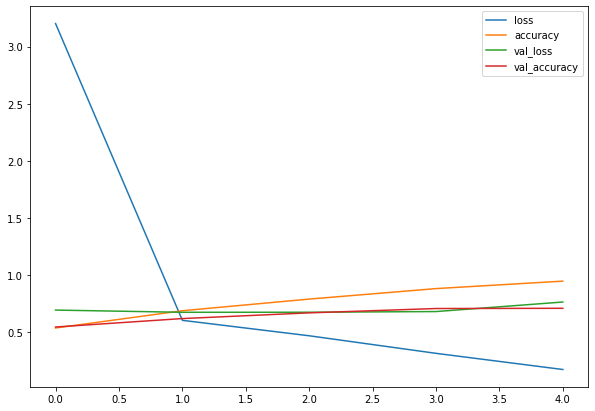

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

###Now using the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) and replicate above model 

####MODEL_2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model without Conv2D and MaxPooling Layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 10s 215ms/step - loss: 194.6599 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


Our model_2 ran but it seem it doesn't learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_33 (Dense)            (None, 4)                 602116    
                                                                 
 dense_34 (Dense)            (None, 4)                 20        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


One of the most noticeable things here is the much larger number of parameters in model_2 versus model_1.


Model_2 has 602,141 trainable parameters where as model_1 has only 31,101. 

And despite this difference, model_1 still far and large out performs model_2. 

Trainable parameters as patterns a model can learn from data. A convolutional neural network seeks to sort out and learn the most important patterns in an image. 

So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features(distinct feature) in an image.

####Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of our model.

####MODEL_3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 13s 271ms/step - loss: 592.8421 - accuracy: 0.6587 - val_loss: 259.6840 - val_accuracy: 0.5560
Epoch 2/5
47/47 [==============================] - 12s 261ms/step - loss: 335.7280 - accuracy: 0.6213 - val_loss: 56.0138 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 12s 265ms/step - loss: 80.2489 - accuracy: 0.6907 - val_loss: 219.4346 - val_accuracy: 0.5680
Epoch 4/5
47/47 [==============================] - 12s 263ms/step - loss: 100.6066 - accuracy: 0.6813 - val_loss: 143.9917 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 12s 263ms/step - loss: 95.9830 - accuracy: 0.6867 - val_loss: 203.5608 - val_accuracy: 0.5200


Looks like our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.

In [ ]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_36 (Dense)            (None, 100)               15052900  
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary classification: Let's break it down

We just went through a lot of the following steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model, normalize and batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat our baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Import and become one with the data

Whatever kind of data we're dealing with, it's a good idea to visualize at least 10-100 samples to start to building our own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

We can also notice if some of the data is messed up (for example, it has the wrong label) and start to consider ways we might go about fixing it.



### 2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have our data seperated into `train` and `test` directories with subfolders in each for each class.

To start we define the training and test directory paths.

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images(standard figure) at a time. 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of the processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.


The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

We might've noticed the `rescale` parameter. This is one example of the transformations we're doing.

Also the imported an images had pixel values were between 0 and 255?

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).


* Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in `(height, width)` format.
* The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the `train_data` object.

In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(32, 32)

Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.


### 3. Create a model (start with a baseline)

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which we try to improve upon. In deep learning a smaller model often refers to a model with less layers than the state of the art models. For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 and EfficientNetB(x) might have 50+ layers

In our case, let's take a smaller version of the model that can be found on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (`model_1` from above) and build a 3 layer convolutional neural network

And it follows the typical CNN structure of:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```


Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.

* `filters` - these are the number of "feature extractors" that will be moving over our images or the hidden layer size

* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.

* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.

* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input ie it adds a padding layer to capture the details, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

The main question still remains regarding the feature. What is a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

### 4. Fit a model

Our model is compiled, time to fit it.

We'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
# Check lengths of training and test data generators using MODEL_1
len(train_data), len(valid_data)

(47, 16)

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure() # 2nd figure
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

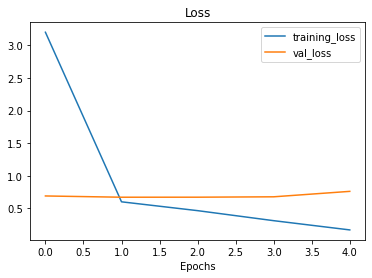

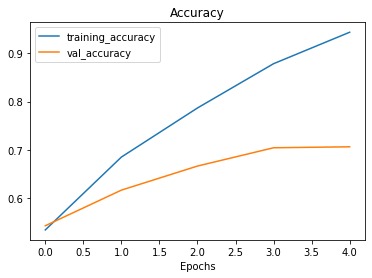

In [ ]:
# Check out the loss curves of model_1
plot_loss_curves(history_1)

If there's a large gap between the training curve and validation curve, it means our model is probably overfitting.

### 6. Adjust the model parameters

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.


So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.


Namely, we'll build 2 more models:
* A ConvNet with max pooling
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Let's built it. It'll have the same structure as `model_1` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

In [ ]:
#Making and creating a consize model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

####MODEL_4

In [ ]:
#Set random seed
tf.random.set_seed(42)
#Built the model
model_4 =  Sequential([
                       Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                       MaxPool2D(pool_size=2), #Max Pooling layer as figuring out the most important of those features. 
                       Conv2D(10, 3, activation='relu'),
                       MaxPool2D(),#pool_size default is 2
                       Conv2D(10, 3, activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(1, activation='sigmoid')
])

#Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
47/47 [==============================] - 48s 991ms/step - loss: 3.6086 - accuracy: 0.5213 - val_loss: 0.7464 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 46s 973ms/step - loss: 0.7102 - accuracy: 0.5647 - val_loss: 0.7107 - val_accuracy: 0.5680
Epoch 3/5
47/47 [==============================] - 45s 964ms/step - loss: 0.6638 - accuracy: 0.6153 - val_loss: 0.6838 - val_accuracy: 0.6180
Epoch 4/5
47/47 [==============================] - 46s 985ms/step - loss: 0.6255 - accuracy: 0.6580 - val_loss: 0.6841 - val_accuracy: 0.6400
Epoch 5/5
47/47 [==============================] - 45s 965ms/step - loss: 0.5481 - accuracy: 0.7260 - val_loss: 0.6836 - val_accuracy: 0.6540


In [ ]:
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)     

After each MaxPooling2D layer, the parameters(shape) gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image.

The results of this pooling are seen in a major reduction of total trainable parameters of model_4 compare to `model_2` and `model_3`

Time to check out the loss curves.


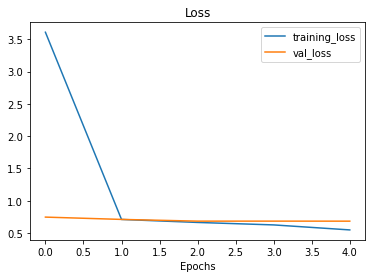

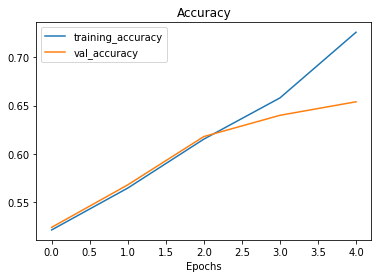

In [ ]:
plot_loss_curves(history_4)

The Val Loss doesn't seem to decrease much and the Val Accuracy overlaps the training Accuracy which could mean overfitting. Let's try another method of overfitting prevention, data augmentation.

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.


In [ ]:
#Create ImageDataGenerator of training data with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., #rescale is type of data augmentation
                                             rotation_range=0.2, # rotate the image slightly between 0 and 20 degree and this is an int not a float
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

#Above hyperparameters are actually a range and randomly done i.e 1 image may have rotation_range of 0.1, sher_range of 0.1 etc, other image rotation_range could be 0.2 etc
#randomly every image is tuned 

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

Data augmentation is usually only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) #not shuffling to check the difference between augmented and non augmented data

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) 

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
aug_images, aug_labels = train_data_augmented.next()
print(len(images),len(labels), len(aug_images),len(aug_labels))

32 32 32 32


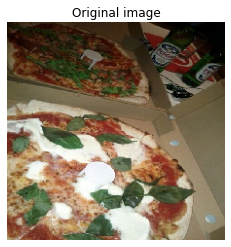

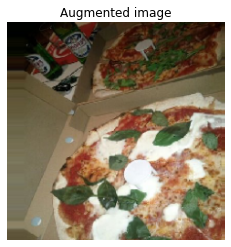

In [ ]:
# Let's compare normal image vs. Augmented image
random_no = random.randint(0,32) #batch size of 32
plt.imshow(images[random_no])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_no])
plt.title("Augmented image")
plt.axis(False);


After going through a sample of original and augmented images, we can start to see some of the example transformations on the training images.

The augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.


Data augmentation is a way to try and prevent a model overfitting. If our model is overfiting (e.g. the validation loss keeps increasing), we may want to try using data augmentation.

As for how much to data augment, there's no set practice for this.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

####MODEL_5

In [ ]:
#Initializating the model
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))
#time required is little more than model_4 because when data is extracted from the folder, every image is augmented then and there(this doesn't happen with model_5)

Epoch 1/5
47/47 [==============================] - 66s 1s/step - loss: 0.7512 - accuracy: 0.5147 - val_loss: 0.6835 - val_accuracy: 0.6220
Epoch 2/5
47/47 [==============================] - 59s 1s/step - loss: 0.6893 - accuracy: 0.5753 - val_loss: 0.6623 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 59s 1s/step - loss: 0.7096 - accuracy: 0.5673 - val_loss: 0.6625 - val_accuracy: 0.5880
Epoch 4/5
47/47 [==============================] - 59s 1s/step - loss: 0.6833 - accuracy: 0.5873 - val_loss: 0.6447 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 59s 1s/step - loss: 0.6486 - accuracy: 0.6100 - val_loss: 0.5765 - val_accuracy: 0.8080


###Our model didn't get very good results on the training set.

It's because when we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time. 

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set `shuffle=False` for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting `shuffle=True` on future data generators.

We may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data.

This is because the `ImageDataGenerator` instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

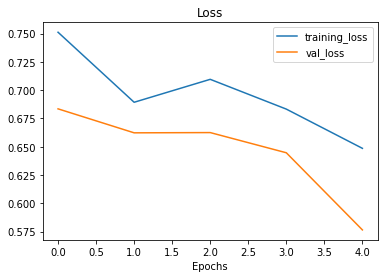

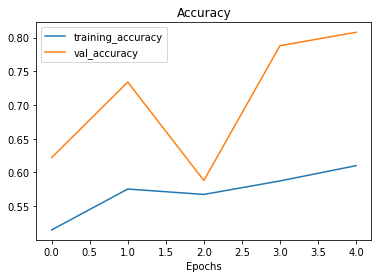

In [ ]:
plot_loss_curves(history_5)

It seems our validation accuracy curve is heading in the right direction but sharp decrease at 2nd epoch. 

Let's see what happens when we shuffle the augmented training data.


In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


####MODEL_6

In [ ]:
# Create the model same as model_5 but with augmented shuffled data
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled, # now the augmented data is shuffled(both pizza and steak)
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))
#if loss graph goes up, model could be overfitting. Therefore tweaking would be necessary

Epoch 1/5
47/47 [==============================] - 63s 1s/step - loss: 0.6403 - accuracy: 0.6320 - val_loss: 0.4812 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 58s 1s/step - loss: 0.5182 - accuracy: 0.7527 - val_loss: 0.3761 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.4964 - accuracy: 0.7653 - val_loss: 0.3515 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 59s 1s/step - loss: 0.5240 - accuracy: 0.7553 - val_loss: 0.3665 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 59s 1s/step - loss: 0.4653 - accuracy: 0.7860 - val_loss: 0.3922 - val_accuracy: 0.8320


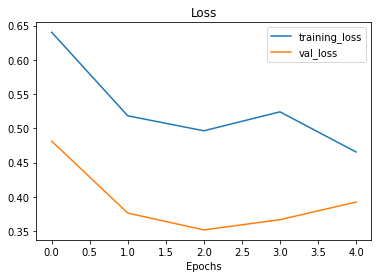

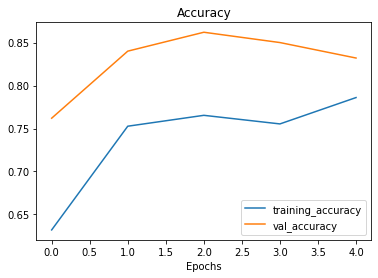

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

Notice with model_6 how the performance on the training dataset improves almost immediately compared to model_5. This is because we shuffled the training data as we passed it to the model using the parameter shuffle=True in the flow_from_directory method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data


### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers- Conv2D, MaxPool2D).

* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).

* Train for longer (more epochs).

* Finding an ideal learning rate.

* Get more data (give the model more opportunities to learn).

* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.


Let's go back to right where we started and try our original model + data Augmentation (`model_1` or the TinyVGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/))


In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 122s 3s/step - loss: 0.6574 - accuracy: 0.5933 - val_loss: 0.5894 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 104s 2s/step - loss: 0.5294 - accuracy: 0.7367 - val_loss: 0.5552 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 106s 2s/step - loss: 0.4953 - accuracy: 0.7680 - val_loss: 0.4565 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 104s 2s/step - loss: 0.4769 - accuracy: 0.7860 - val_loss: 0.3382 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 106s 2s/step - loss: 0.4531 - accuracy: 0.8007 - val_loss: 0.5277 - val_accuracy: 0.7760


In [ ]:
# Check model_1 architecture (same as model_7)
model_1.summary() #without data augmentation shuffled 

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                 

In [ ]:
#model_7 architecture (same as model_1)
model_7.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

Parameters in both `model_1` and `model_6` exactly the same. Let's check the accuracy and loss curves

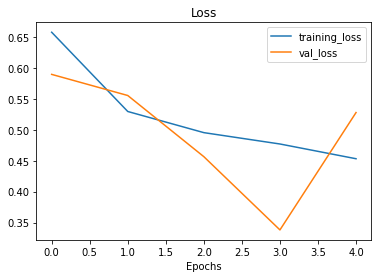

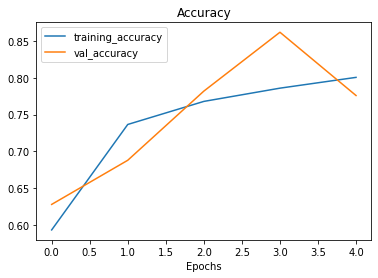

In [ ]:
plot_loss_curves(history_7)

Val Loss is sharply decreasing and increasing while reverse is happending with Val Accuracy. This could mean a lot of things: Overfitting, Less Generalization etc

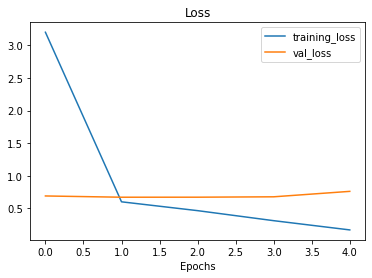

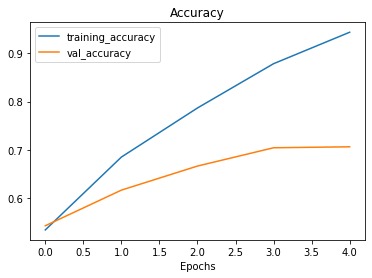

In [ ]:
# How does this training curve look on model_1 compared to the one above?
plot_loss_curves(history_1)

Taking another look at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).


Making a prediction with our trained model
To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.

--2022-07-03 07:15:30--  https://images-gmi-pmc.edge-generalmills.com/b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg
Resolving images-gmi-pmc.edge-generalmills.com (images-gmi-pmc.edge-generalmills.com)... 152.195.60.25
Connecting to images-gmi-pmc.edge-generalmills.com (images-gmi-pmc.edge-generalmills.com)|152.195.60.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73841 (72K) [image/jpg]
Saving to: ‘b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg.3’

b57ee35f-bce2-4229- 100%[===================>]  72.11K  --.-KB/s    in 0.01s   

2022-07-03 07:15:30 (5.23 MB/s) - ‘b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg.3’ saved [73841/73841]



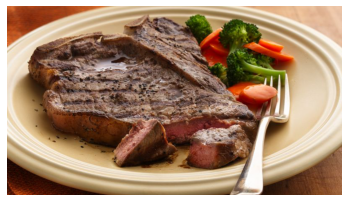

In [ ]:
# View our example image
import matplotlib.image as mping
!wget https://images-gmi-pmc.edge-generalmills.com/b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg 
os. rename("b57ee35f-bce2-4229-8bf5-19b97876a4cb.jpg", "03-steak.jpeg")
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(450, 800, 3)

Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.8170643 , 0.428829  , 0.20529962],
        [0.80805576, 0.41982046, 0.19629103],
        [0.8122449 , 0.42400962, 0.20832334],
        ...,
        [0.92941177, 0.78431374, 0.67058825],
        [0.92156863, 0.7764706 , 0.6627451 ],
        [0.91764706, 0.77254903, 0.65882355]],

       [[0.8119773 , 0.4158989 , 0.19629103],
        [0.78935575, 0.39327732, 0.17366946],
        [0.8006352 , 0.40455684, 0.18494898],
        ...,
        [0.9263081 , 0.78121   , 0.6674845 ],
        [0.9249301 , 0.77983207, 0.6661066 ],
        [0.9122874 , 0.7671894 , 0.65346384]],

       [[0.8002351 , 0.39239198, 0.18864545],
        [0.80187327, 0.3940301 , 0.18618698],
        [0.8101516 , 0.40623   , 0.17877902],
        ...,
        [0.92431974, 0.7792217 , 0.66549623],
        [0.9249301 , 0.77983207, 0.6661066 ],
        [0.91238743, 0.7672894 , 0.6535639 ]],

       ...,

       [[0.3038973 , 0.08892915, 0.03264687],
        [0.43

In [ ]:
# Make a prediction on our custom image
#model_7.predict(steak) 
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0, 4D tensor
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.8170643 , 0.428829  , 0.20529962],
         [0.80805576, 0.41982046, 0.19629103],
         [0.8122449 , 0.42400962, 0.20832334],
         ...,
         [0.92941177, 0.78431374, 0.67058825],
         [0.92156863, 0.7764706 , 0.6627451 ],
         [0.91764706, 0.77254903, 0.65882355]],

        [[0.8119773 , 0.4158989 , 0.19629103],
         [0.78935575, 0.39327732, 0.17366946],
         [0.8006352 , 0.40455684, 0.18494898],
         ...,
         [0.9263081 , 0.78121   , 0.6674845 ],
         [0.9249301 , 0.77983207, 0.6661066 ],
         [0.9122874 , 0.7671894 , 0.65346384]],

        [[0.8002351 , 0.39239198, 0.18864545],
         [0.80187327, 0.3940301 , 0.18618698],
         [0.8101516 , 0.40623   , 0.17877902],
         ...,
         [0.92431974, 0.7792217 , 0.66549623],
         [0.9249301 , 0.77983207, 0.6661066 ],
         [0.91238743, 0.7672894 , 0.6535639 ]],

        ...,

        [[0.3038973 , 0.08892915, 

In [ ]:
# Make a prediction on custom image tensor
pred = model_7.predict(steak)
pred # prediction probabilites

array([[0.97805136]], dtype=float32)

The predictions come out in prediction probability form. This means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename) # 3D tensor

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}",color='green')
  plt.axis(False);

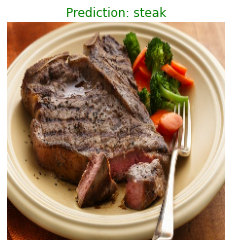

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg", class_names)

#Note:
Part 2 and Part 3 of this Food Vision 101 will cover working with multiclass data having 10 to 101 class of food. 
Also using Advance Techniques of Transfer Learning  like Feature Extraction, Fine-Tuning and finally scaling up the entire project.